# The scikit-learn interface

In [1]:
import addutils.toc ; addutils.toc.js(ipy_notebook=True)

In [2]:
import scipy.io
import numpy as np
import pandas as pd
from addutils import css_notebook
css_notebook()

## Defining the estimator object

In scikit-learn, almost all operations are done through an **estimator object**. For example, a linear regression estimator can be instantiated as follows:

In [3]:
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept=True, normalize=True)
print model

LinearRegression(copy_X=True, fit_intercept=True, normalize=True)


In brackets are displayed the current values for the “hyperparameters” of the estimator. To learn about the specific “hyperparameters” check the documentation:

In [4]:
# Try: model?

Meta parameters can be changed after the model has been created:

In [5]:
model.fit_intercept = False
print model

LinearRegression(copy_X=True, fit_intercept=False, normalize=True)


Given a scikit-learn *estimator* object named `model`, the following methods are available:

* *Available in all Estimators*
  * `model.fit()` : fit training data.
      * For supervised learning, this accepts two arguments: `model.fit(X, y)`.
      * For unsupervised learning, this accepts only a single argument `model.fit(X)`.
* *Available in supervised estimators*
  * `model.predict()` : predict the label of a new set of data. This accepts one argument `model.predict(X_new)`).
  * `model.predict_proba()`: Returns the probability of a categorical label. The label itself is returned by `model.predict()`.
  * `model.score()`: Scores are between 0 and 1, with a larger score indicating a better fit.
* *Available in unsupervised estimators*
  * `model.transform()`: Transform new data into the new basis. This accepts one argument `X_new`, and returns the new representation of the data.
  * `model.fit_transform()`: some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

## 1 Simple estimator example: fit a linear regression model


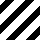
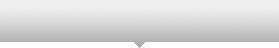
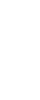
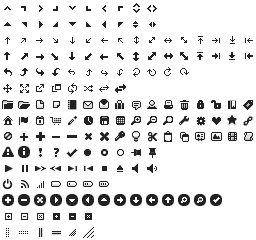
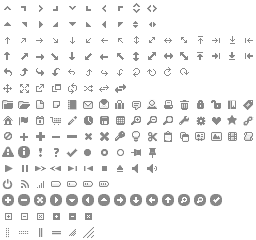
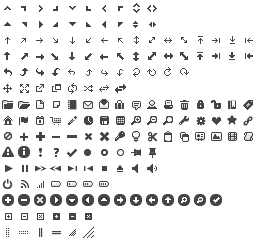
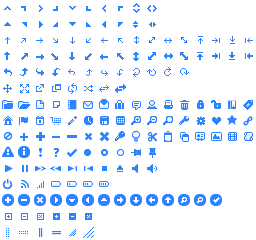
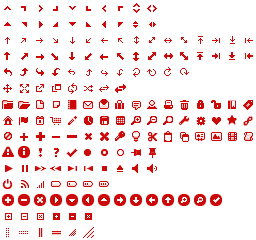
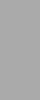
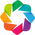
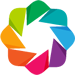
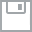
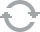
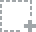
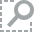
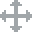
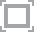
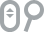

In [6]:
import bokeh.plotting as bk
bk.output_notebook()

In [7]:
from sklearn import datasets, preprocessing, metrics
X, y = datasets.samples_generator.make_regression(n_samples=70,
                                                  n_features=1, n_informative=1,
                                                  random_state=0, noise=5)
scaler = preprocessing.MinMaxScaler()
X_sc = scaler.fit_transform(X)

lin = linear_model.LinearRegression(fit_intercept=True)
lin.fit(X_sc, y)

print lin
print "Model coefficient: %.5f, and intercept: %.5f" % (lin.coef_, lin.intercept_)
err = metrics.mean_squared_error(lin.predict(X_sc), y)
print ("Mean Squared Error: %.2f" % err)

# Plot the data and the model prediction
X_p = np.linspace(0, 1, 2)[:, np.newaxis]
y_p = lin.predict(X_p)

fig = bk.figure(title='Simple Regression', 
                x_axis_label='X scaled',
                y_axis_label='y',
                plot_width=600, plot_height=300)
fig.circle(X_sc.squeeze(), y, line_color='darkgreen', size=10,
           fill_color='green', fill_alpha=0.5, legend='Measured Data')
fig.line(X_p.ravel(), y_p, line_color='blue', legend='Predicted Values')
fig.legend.orientation = 'bottom_right'
bk.show(fig)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
Model coefficient: 275.99550, and intercept: -145.41186
Mean Squared Error: 23.04


## 2 Separate Training and Validation Sets

**Fitting a model and testing it on the same data is a methodological mistake:** a model could have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called <font color="Red">overfitting</font>. To avoid it, it is common practice to hold out part of the available data as a **Validation  Set** `X_valid, y_valid`.

In scikit-learn a random split into **Training** and **Validation** sets can be quickly computed with the `train_test_split` helper function:

In [8]:
from sklearn import cross_validation
X_tr, X_valid, y_tr, y_valid = cross_validation.train_test_split(X_sc, y,
                                                                 test_size=0.30, random_state=0)
lin.fit(X_tr, y_tr)
MSE = metrics.mean_squared_error(lin.predict(X_valid), y_valid)
print ("Mean Squared Error: %.2f" % MSE)
print "Model coefficient: %.5f, and intercept: %.5f" % (lin.coef_, lin.intercept_)

X_predicted = np.linspace(0, 1, 2)[:, np.newaxis]
y_predicted = lin.predict(X_predicted)
fig = bk.figure(title='Training and Validation Sets', 
                plot_width=700, plot_height=400)
fig.circle(X_tr.squeeze(), y_tr,
           size=5, line_alpha=0.85, fill_color='green', line_color='darkgreen',
           legend='Training Set')
fig.circle(X_valid.squeeze(), y_valid, 
           size=5, line_alpha=0.85, fill_color='orangered', legend='Validation Set')
fig.line(X_predicted.ravel(), y_predicted, line_color='blue', legend='Linear Regression')
fig.legend.orientation = 'bottom_right'
bk.show(fig)

Mean Squared Error: 23.34
Model coefficient: 273.00288, and intercept: -143.70277


### 2.1 Example: Do a Regression Analysis on MATLAB<sup>&reg;</sup> data

The data are generated with the following MATLAB code:

    % Generate Regression Test Data 02 ----------------------------------------
    samples = 100; features = 5;
    
    X = rand(samples, features)
    for i = 1:samples
        X(i,:) = (X(i,:)*i)+i+0.1;
    end
    % Calculate y as a linear combination of features with coeff. 1.5, 2.5, ...
    % and add some noise
    noise = 0.1;
    lin_comb = (1:features) + 0.5
    y = (X+rand(samples, features)*noise)*lin_comb'
    % Define feature names as 'F001', ... , 'Fnnn' up to 9999 features
    feat_names = sprintf('F%04i',1);
    for i = 2:features
        feat_names = strvcat(feat_names, sprintf('F%04i',i));
    end
    
    save ('matlab_test_data_02', 'X','y', 'feat_names')

In [9]:
from sklearn import preprocessing, cross_validation, linear_model
mat = scipy.io.loadmat('example_data/matlab_test_data_02.mat')
col = [s.strip() for s in list(mat['feat_names'])]

In [10]:
Xt,Xv,yt,yv = cross_validation.train_test_split(mat['X'], mat['y'],test_size=0.30,
                                                random_state=0)
Xt = pd.DataFrame(Xt, columns=col)
Xv = pd.DataFrame(Xv, columns=col)
yt = pd.DataFrame(yt, columns=['measured'])
yv = pd.DataFrame(yv, columns=['measured'])

In [11]:
Xt.head(3)

,F0001,F0002,F0003,F0004,F0005,F0006
0,131.391611,178.588071,191.836028,206.928031,188.601869,195.879822
1,137.771630,91.462643,76.438656,104.585583,123.265090,73.587835
2,789.737369,671.934539,835.830887,515.921167,901.167154,813.659391


In [12]:
# Scaler is fitted only on training data
Xts = Xt.copy()
Xvs = Xv.copy()
scaler = preprocessing.StandardScaler(copy=False, with_mean=True, with_std=True).fit(Xt)
scaler.transform(Xts)
scaler.transform(Xv);

In [13]:
Xts.head(3)

,F0001,F0002,F0003,F0004,F0005,F0006
0,-1.294851,-1.210162,-1.171325,-1.148142,-1.198971,-1.160278
1,-1.281377,-1.399557,-1.416333,-1.371187,-1.344097,-1.424161
2,0.095500,-0.137716,0.195982,-0.474723,0.383782,0.172776


In [14]:
model = linear_model.LinearRegression(fit_intercept=True, normalize=True)
model.fit(Xts, yt)
# NOTICE: coefficients are much different from 1.5, 2.5, ... when fitting on scaled data
print model.coef_
print model.intercept_

[[  708.82319504  1153.80993668  1647.24008556  2066.72663569
   2474.24236679  3011.70541794]]
[ 17692.80536173]


In [15]:
# Plot the data and the model prediction
yp = model.predict(Xvs)
fig = bk.figure(title='Measured Values VS Predicted Values',
                x_axis_label='y val', y_axis_label='y pred',
                plot_width=600, plot_height=400)
fig.circle(yv['measured'], yp[:,0], size=8,
           fill_color='blue', fill_alpha=0.5, line_color='black', alpha=0.2)
bk.show(fig)

### 2.2 Example: Training and a Validation Sets on a Classification Problem

The K-neighbors is an instance-based classifier that predicts the label of an unknown point based on the labels of the *K* nearest points in the parameter space:

In [16]:
from sklearn import neighbors
digits = datasets.load_digits()
X, y = digits.data, digits.target

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)
print metrics.confusion_matrix(y_pred, y)
print '\nF1 Score:  ', metrics.f1_score(y_pred, y)

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]

F1 Score:   1.0


Apparently, we've found a perfect classifier!  But this is misleading for the reasons we saw before: the classifier essentially "memorizes" all the samples it has already seen.  To really test how well this algorithm does, we need to try some samples it *hasn't* yet seen.

Here we split the original data in **Training** and **Validation** sets and run again the previous algorithm. In this case we see that we still have a good classifier but the precision is reduced:

In [17]:
X_tr, X_valid, y_tr, y_valid = cross_validation.train_test_split(X, y,
                                                                 test_size=0.40, random_state=0)
clf = neighbors.KNeighborsClassifier(n_neighbors=1).fit(X_tr, y_tr)
y_pred = clf.predict(X_valid)
print metrics.confusion_matrix(y_valid, y_pred)
print '\nF1 Score:  ', metrics.f1_score(y_valid, y_pred)

[[60  0  0  0  0  0  0  0  0  0]
 [ 0 73  0  0  0  0  0  0  0  0]
 [ 0  0 71  0  0  0  0  0  0  0]
 [ 0  0  0 70  0  0  0  0  0  0]
 [ 0  0  0  0 63  0  0  0  0  0]
 [ 0  0  0  0  0 87  1  0  0  1]
 [ 0  0  0  0  0  0 76  0  0  0]
 [ 0  0  0  0  0  0  0 65  0  0]
 [ 0  2  0  1  0  0  0  0 74  1]
 [ 0  0  0  2  0  1  0  0  0 71]]

F1 Score:   0.987441080752


## 3 Cross Validation (CV)

By partitioning the available data into **Training** and **Validation** sets, we reduce the number of samples which can be used for learning the model.

By using cross-validation **(CV)** the *validation set is defined automatically by the CV algoritm. * The training set is split into k smaller sets and:

* A model is trained using k-1 of the folds as training data
* The resulting model is validated on the remaining part of the data

In this example we first calculate the Mean Squared Error on the Test DatasetSet (which is a methodological error) and then we calculate again the same MSE using a KFold CV. The MSE calculated with Cv is much larger:

In [18]:
X, y = datasets.samples_generator.make_regression(n_samples=7,
                                                  n_features=1, n_informative=1,
                                                  random_state=0, noise=5)
lin = linear_model.LinearRegression(fit_intercept=True)
lin.fit(X, y)
MSE = metrics.mean_squared_error(lin.predict(X), y)
print 'MSE Calculated on the Training Set:   ', MSE
MSE_CV = cross_validation.cross_val_score(lin, X, y, cv=5, scoring='mean_squared_error')
print("MSE Calculated with Cross Validation: %0.2f (+/- %0.2f)"
      % (MSE_CV.mean(), MSE_CV.std() * 2))

MSE Calculated on the Training Set:    19.5876545263
MSE Calculated with Cross Validation: -49.85 (+/- 80.06)


When the `cv` argument is an integer like `cv=10`, `cross_val_score` uses the `KFold` or `StratifiedKFold` strategies. It is also possible to use other cross validation strategies by passing a cross validation iterator instead, for instance we can use `cross_validation.ShuffleSplit` where `n_iter` is the number of re-shuffling and splitting operations:

In [19]:
n_samples = X.shape[0]
cv_iter = cross_validation.ShuffleSplit(n_samples, n_iter=6, test_size=0.2, random_state=0)
MSE_CV = cross_validation.cross_val_score(lin, X, y, cv=cv_iter, scoring='mean_squared_error')
print("MSE Calculated with Cross Validation: %0.2f (+/- %0.2f)"
      % (MSE_CV.mean(), MSE_CV.std() * 2))

MSE Calculated with Cross Validation: -33.84 (+/- 36.87)


### 3.1 Cross Validation: test many estimators on the same dataset:

In this example *we use the "diabetes" dataset* to fit tree different linear models. For each model the default CV score is calculated and displayed:

In [20]:
data = datasets.load_diabetes()
X, y = data.data, data.target

for Model in [linear_model.LinearRegression,
              linear_model.Ridge,
              linear_model.Lasso]:
    model = Model()
    print Model.__name__, ': ', cross_validation.cross_val_score(model, X, y).mean()

LinearRegression :  0.488702767247
Ridge :  0.409427438303
Lasso :  0.353800083299


### 3.2 Cross Validation: test many hyperparamaters and estimators on the same dataset:

`Lasso` and `Ridge` accept a regularization parameter `alpha`. Here we plot the CV Score for different values of alpha

In [21]:
from bokeh.models.axes import LogAxis

alphas = np.logspace(-4, -1, 200)
fig = bk.figure(title='Alpha sensitiveness on different models',
                plot_width=800, plot_height=400,
                x_axis_type='log', 
                x_range=(min(alphas), max(alphas)))

for Model, color in [(linear_model.Ridge, 'blue'), (linear_model.Lasso, 'green')]:
    scores = [cross_validation.cross_val_score(Model(alpha=a), X, y, cv=5).mean()
              for a in alphas]
    fig.line(alphas, scores, line_color=color, legend=Model.__name__)

fig.legend.orientation = 'bottom_left'
bk.show(fig)

### 3.3 Model specific Cross Validation:

Some models can fit data for a range of parameters almost as efficiently as fitting for a single parameter. The most common parameter amenable to this strategy is the strength of the regularizer. In this case we say that we compute the regularization path of the estimator.

This is a particular case of what we are going to see in the next paragraph: **Grid Search**.

Model Specific Cross Validation is supported by the following models:

* **RidgeCV**
* **RidgeClassifierCV**
* **LarsCV**
* **LassoLarsCV**
* **LassoCV**
* **ElasticNetCV**

In [22]:
for Model in [linear_model.RidgeCV, linear_model.LassoCV]:
    model = Model(alphas=alphas, cv=5).fit(X, y)
    print Model.__name__, ': ', model.alpha_

RidgeCV :  0.000373993730248
LassoCV :  0.00382749447852


### 3.4 Cross-validation iterators

* **K-fold** - divide all samples in *K* groups, if *K=n* it is equivalent to leave-one-out.
* **Statified K-fold** - each set contains the same prercentage of the target classes as the whole set
* **Leave-One-Out (LOO)** - all samples except one
* **Leave-P-Out (LPO)** - create all possible training sets by removing *p* samples from the whole set
* **Leave-One-Label-Out (LOLO)** - holds out the samples according to a third-party provided label
* **ShuffleSplit** - shuffles than split data in train and test sets
* **StratifiedShuffleSplit** - ShuffleSplits by preserving percentage
* **Bootstrap** - generate independent splits and then resample with replacement each split

In [23]:
X = np.arange(20).reshape(10,2)
y = np.arange(10)

**KFold** split dataset into k consecutive folds (without shuffling):

In [24]:
kf = cross_validation.KFold(len(y), n_folds=5)
for train, test in kf:
    print train, test

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


**ShuffleSplit** do not guarantee that all folds will be different:

In [25]:
ss = cross_validation.ShuffleSplit(len(y), n_iter=5, test_size=0.2)
for train, test in ss:
    print train, test

[8 0 7 4 6 2 5 9] [3 1]
[4 7 0 2 5 6 3 8] [9 1]
[7 4 1 2 8 3 5 0] [9 6]
[4 8 6 3 9 5 7 2] [1 0]
[1 8 9 3 6 7 5 4] [0 2]


**Bootstrap** example:

In [26]:
bs = cross_validation.LeaveOneLabelOut(range(len(y)))
for train, test in bs:
    print train, test

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


## 4 Grid Search: Searching for estimator hyperparameters

`GridSearchCV` can optimize any parameter provided by `estimator.get_params()` by exhaustively fitting the model with any parameter combination.

When evaluating different settings (“hyperparameters”) for estimators.

`GridSearchCV` will optimize the hyperparameters on the **TRAINING set** (whereas the **VALIDATION set** is generated by CV). After the optimization has been done, the performances of the estimator can be evaluated on a third set called **TEST set**:

### 4.1 Exhaustive Grid Search

We'll pass to `GridSearchCV` a dictionary of parameters containing a list of hyperparameters to be searched. In this case we set `verbose=2` to see an output about all the searches done by the algorithm:

In [27]:
from sklearn import svm, grid_search
# Standardize the data
iris = datasets.load_iris()
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(iris.data)
# Keep out the Test Set
X_tr, X_test, y_tr, y_test = cross_validation.train_test_split(X, iris.target,
                                                               test_size=0.30, random_state=0)
# Define the Search Grid
param_grid = [{'C': [1, 10], 'kernel': ['linear']},
              {'C': [2], 'gamma': [0.1, 0.01], 'kernel': ['rbf']}]
# GridSearchCV
clf = grid_search.GridSearchCV(svm.SVC(), param_grid, cv=2, n_jobs=-1, verbose=2)
clf.fit(X_tr, y_tr)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] kernel=linear, C=1 ..............................................
[CV] kernel=linear, C=1 ..............................................
[CV] kernel=linear, C=10 .............................................
[CV] kernel=linear, C=10 .............................................
[CV] kernel=rbf, C=2, gamma=0.1 ......................................
[CV] kernel=rbf, C=2, gamma=0.01 .....................................
[CV] kernel=rbf, C=2, gamma=0.01 .....................................
[CV] kernel=rbf, C=2, gamma=0.1 ......................................
[CV] ..................................... kernel=linear, C=1 -   0.0s
[CV] ..................................... kernel=linear, C=1 -   0.0s
[CV] .................................... kernel=linear, C=10 -   0.0s
[CV] .................................... kernel=linear, C=10 -   0.0s
[CV] ............................. kernel=rbf, C=2, gamma=0.1 -   0.0s
[CV] .............

[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


GridSearchCV(cv=2,
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10]}, {'kernel': ['rbf'], 'C': [2], 'gamma': [0.1, 0.01]}],
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=2)

**TODO -** Create a Surf Plot with the accuracy values found on an hyperparameter grid using the .grid_scores_ data

In [28]:
for item in clf.grid_scores_:
    print item.index
    print item.parameters
    print item.parameters['C']

<built-in method index of _CVScoreTuple object at 0x7eff3a315f70>
{'kernel': 'linear', 'C': 1}
1
<built-in method index of _CVScoreTuple object at 0x7eff3a315d60>
{'kernel': 'linear', 'C': 10}
10
<built-in method index of _CVScoreTuple object at 0x7eff3a315f18>
{'kernel': 'rbf', 'C': 2, 'gamma': 0.1}
2
<built-in method index of _CVScoreTuple object at 0x7eff3a3a54c8>
{'kernel': 'rbf', 'C': 2, 'gamma': 0.01}
2


Then we can check the accuracy on the **Test Set**:

In [29]:
best = clf.best_estimator_
print 'Best estimator: ', best
scores = cross_validation.cross_val_score(best, X_test, y_test, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Best estimator:  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy: 0.91 (+/- 0.22)


Different `score` metrics can be used while doing `GridSearchCV`:

In [30]:
X_tr, X_test, y_tr, y_test = cross_validation.train_test_split(X, iris.target,
                                                               test_size=0.60, random_state=0)
scores = ['precision', 'recall']
param_grid = [{'C': np.logspace(-3,0,4, base=2), 'kernel': ['linear']},
              {'C': [1, 10], 'gamma': [0.1], 'kernel': ['rbf']}]
print 'PRECISION: fraction of retrieved instances that are relevant'
print 'RECALL:    fraction of relevant instances that are retrieved'
for score in scores:
    print '\nTuning hyper-parameters for: %s' % score
    clf = grid_search.GridSearchCV(svm.SVC(), param_grid, cv=5, scoring=score)
    clf.fit(X_tr, y_tr)
    print '\nBest parameters set found on development (training) set:'
    print clf.best_estimator_
    print '\nGrid Scores on development set:'
    for item in clf.grid_scores_:
        print item
    print '\nDetailed classification report (on Testing Set)'
    y_true, y_pred = y_test, clf.predict(X_test)
    print(metrics.classification_report(y_true, y_pred))
    print '-----------------------------------------------------'
        

PRECISION: fraction of retrieved instances that are relevant
RECALL:    fraction of relevant instances that are retrieved

Tuning hyper-parameters for: precision

Best parameters set found on development (training) set:
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Grid Scores on development set:
mean: 0.92000, std: 0.08354, params: {'kernel': 'linear', 'C': 0.125}
mean: 0.95333, std: 0.06504, params: {'kernel': 'linear', 'C': 0.25}
mean: 0.98667, std: 0.02667, params: {'kernel': 'linear', 'C': 0.5}
mean: 0.97417, std: 0.03480, params: {'kernel': 'linear', 'C': 1.0}
mean: 0.94083, std: 0.06132, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}
mean: 0.97417, std: 0.03480, params: {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}

Detailed classification report (on Testing Set)
             precision    recall  f1-score   support

          0       1.00

### 4.2 Randomized Parameter Optimization

`RandomizedSearchCV` implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits:

* A budget can be chosen independent of the number of parameters and possible values.
* Adding parameters that do not influence the performance does not decrease efficiency.

Specifying how parameters should be sampled is done using a dictionary. The number of sampling iterations, is specified using the `n_iter` parameter. For each parameter, either a distribution over possible values or a list of discrete choices (which will be sampled uniformly) can be specified. This is a little example of the many statistical distributions available in `scipy`:

In [31]:
import scipy.stats
from bokeh.charts import Histogram

w, h = 350, 300

dists = [
    scipy.stats.expon(scale=100), # the frozed uniform distribution
    scipy.stats.norm(loc=40, scale=10), # the frozed uniform distribution
    scipy.stats.uniform(loc=20, scale=100), # the frozed uniform distribution
    scipy.stats.beta(2,2,loc=20, scale=100) # the frozed uniform distribution
]

figs = [ Histogram(dist.rvs(1e4), bins=50, 
                   width=w, height=h, 
                   xlabel=None, ylabel=None)
        for dist in dists ]

bk.show(bk.gridplot([[figs[0], figs[1]],
                     [figs[2], figs[3]] 
                     ]))

---

Visit [www.add-for.com](<http://www.add-for.com/IT>) for more tutorials and updates.

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.